# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [12]:
df=pd.read_csv("/content/Fraud_check.csv")

In [13]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA and Data Visualizations

In [14]:
df['income']='<=30000'
df.loc[df['Taxable.Income']>30000,'income']='Good'
df.loc[df['Taxable.Income']<=30000,'income']='Risky'

In [15]:
df.drop(['Taxable.Income'],axis=1,inplace=True)

In [16]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [19]:
le=LabelEncoder()

In [20]:
for column_name in df.columns:
  if df[column_name].dtype==object:
    df[column_name]=le.fit_transform(df[column_name])
  else:
    pass

In [21]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   income           600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [24]:
df.describe()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,199778.000000,30.000000,1.000000,1.000000


<Axes: >

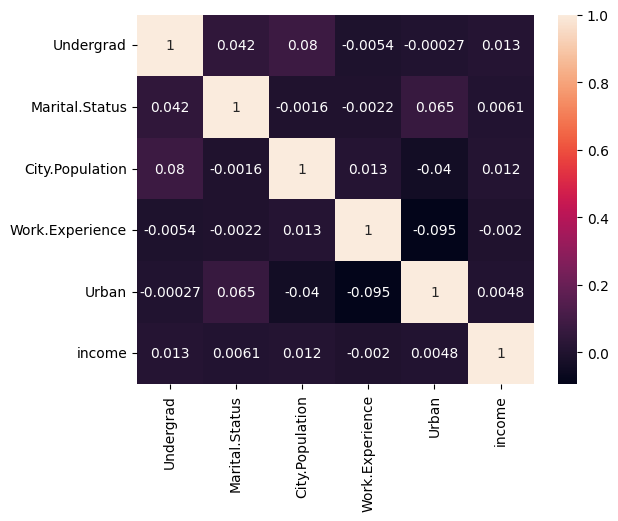

In [26]:
sns.heatmap(df.corr(),annot=True)

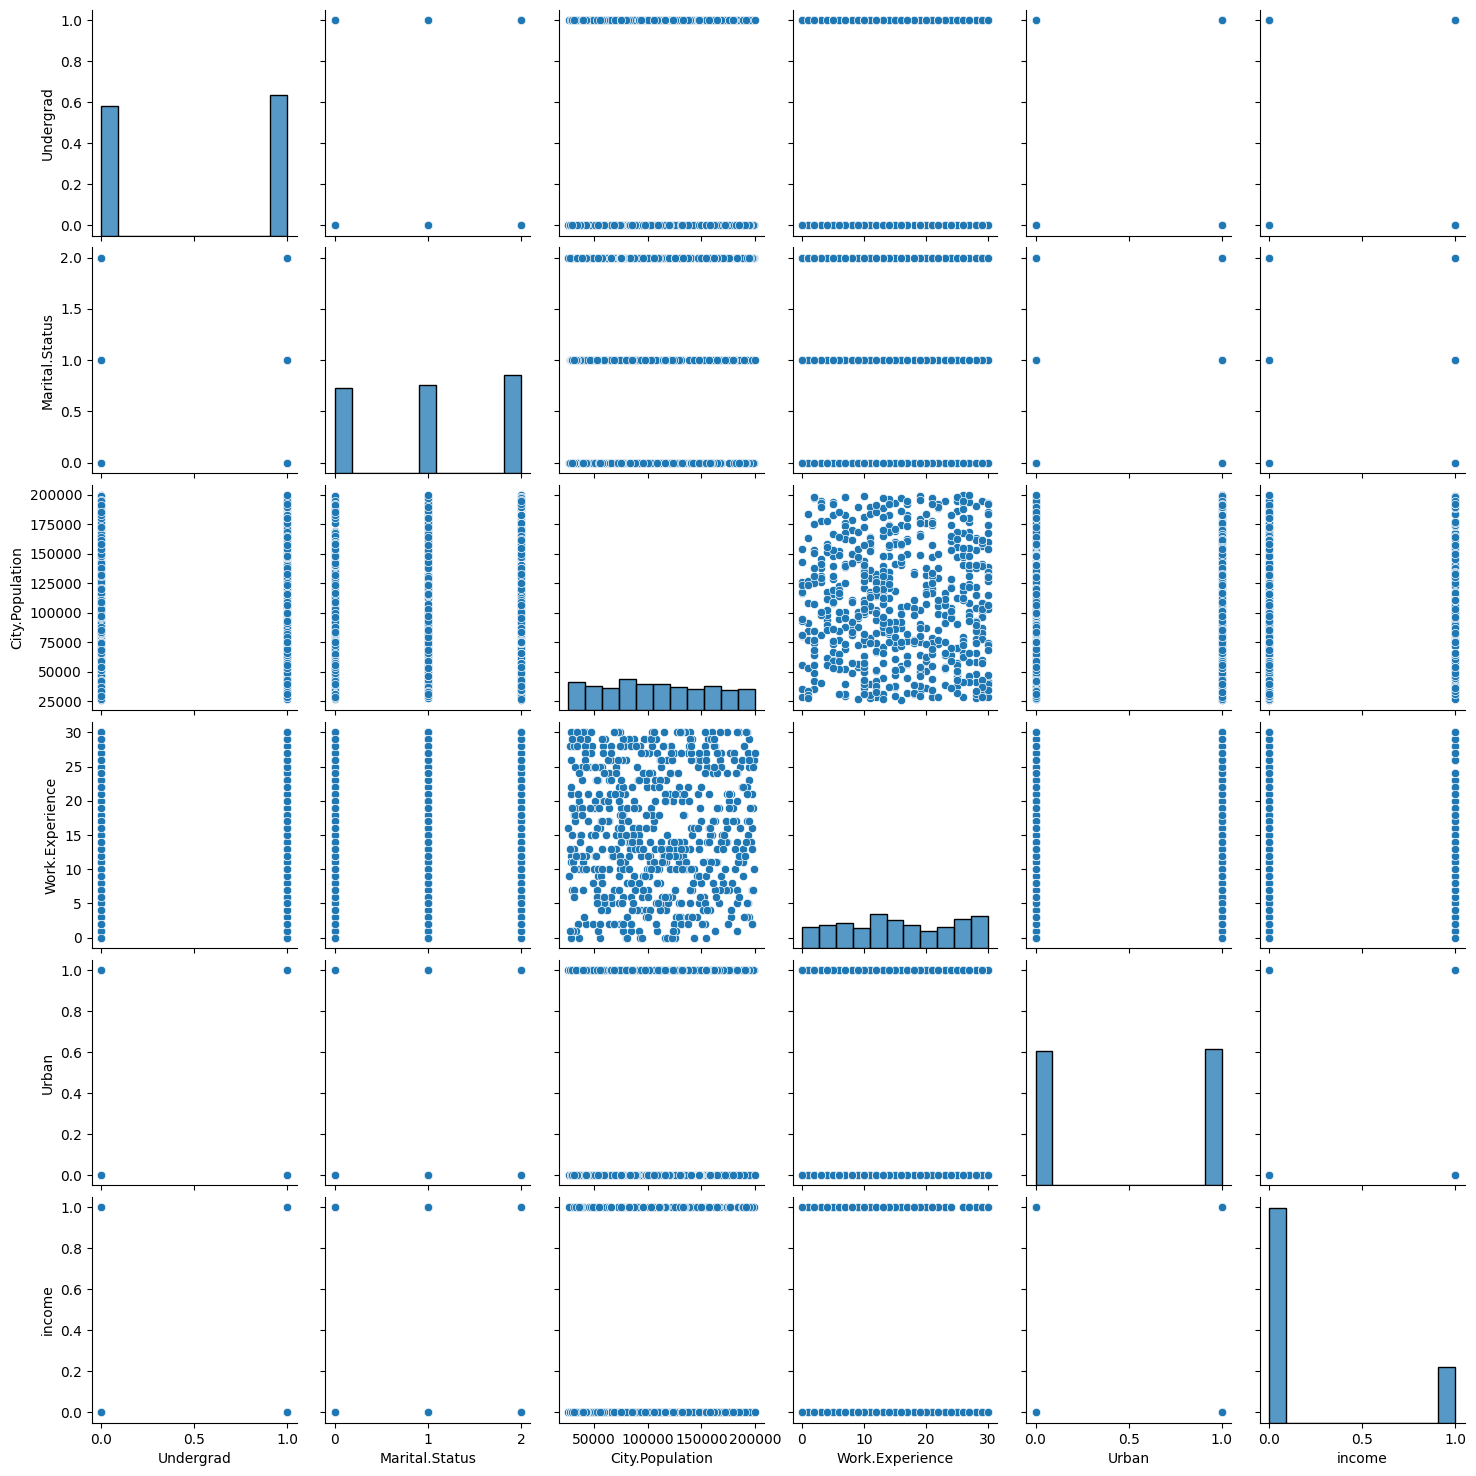

In [27]:
sns.pairplot(df)

# Feature Scaling

In [29]:
X=df.drop(['income'],axis=1)
Y=df.iloc[:,-1]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=20,test_size=0.2)

# Random Forest using Entropy

In [51]:
kf=KFold(n_splits=10,random_state=20,shuffle=True)

In [52]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=15,max_features=3)

In [53]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=15)

In [54]:
res=cross_val_score(rf,x_train,y_train,cv=kf)

In [55]:
res.mean()

0.7166666666666667

In [56]:
ypred=rf.predict(x_test)

In [57]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
accuracy_score(y_test,ypred)

0.7583333333333333

# Random Forest Using Gini Index

In [64]:
rf1 = RandomForestClassifier(criterion = "gini",n_estimators=15,max_features=3)
rf1.fit(x_train,y_train)
ypred1=rf1.predict(x_test)
ypred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
res1=cross_val_score(rf1,x_train,y_train,cv=kf)

In [66]:
res1.mean()

0.7020833333333333

In [67]:
accuracy_score(y_test,ypred1)

0.7583333333333333